In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
import datetime
now = datetime.datetime.now()
print (now)
now.strftime("%Y-%m-%d %H:%M")

2018-08-30 02:22:47.517801


'2018-08-30 02:22'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print (city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
#print (url)

cityError = "City not found!"
temperatures = []
humidities = []
cloudinesses = []
windSpeeds = []
latitudes = []
longitudes = []
countries = []

i = -1
for city in cities[:]:
    i = i + 1
    cityURL = url + "&q=" + city
    #print (cityURL)
    cityWeatherResponse = requests.get(cityURL).json()
    #print(json.dumps(cityWeatherResponse, indent=4, sort_keys=True))
    #print (cityWeatherResponse)
    try:
        cityTemperature = cityWeatherResponse['main']['temp']
        cityHumidity = cityWeatherResponse['main']['humidity']
        #cityCloudiness = cityWeatherResponse['weather'][0]['description']
        cityCloudiness = cityWeatherResponse['clouds']['all']
        cityWindSpeed = cityWeatherResponse['wind']['speed']
        #print(f"City: {city}")
        #print(f"Temperature: {cityTemperature}")
        #print(f"Humidity: {cityHumidity}")
        #print(f"Cloudiness: {cityCloudiness}")
        #print(f"Wind speed: {cityWindSpeed}")
        #print("##################")
        temperatures.append(cityTemperature)
        humidities.append(cityHumidity)
        cloudinesses.append(cityCloudiness)
        windSpeeds.append(cityWindSpeed)
        
        latitude = lats[i]
        latitudes.append(latitude)
        longitude = lngs[i]
        longitudes.append(longitude)
        #cities.append(city)
        #print(latitudes)

    except:
        #print(cityError)
        cities.remove(city)

print(len(temperatures))
print(len(humidities))
print(len(cloudinesses))
print(len(windSpeeds))
print(len(latitudes))
print(len(longitudes))
print(len(countries))
print(len(cities))

556
556
556
556
556
556
0
556


In [5]:
numberTemperatures = len(temperatures)
numberHumidities = len(humidities)
numberCloudinesses =  len(cloudinesses)
numberWindSpeeds = len(windSpeeds)
print(cities)
print(cloudinesses)
#countList = []
#countDF = pd.DataFrame({"Temperature":numberTemperatures, "Humidity":numberHumidities, "Cloudiness":numberCloudinesses, "Wind Speed":numberWindSpeeds}, index=[0])
'''
countDF = pd.DataFrame([{"Temperature":numberTemperatures},
                        {"Humidity":numberHumidities},
                        {"Cloudiness":numberCloudinesses},
                        {"Wind Speed":numberWindSpeeds}
                       ])
'''
#countDF = pd.DataFrame({["Temperature", "Humidity", "Cloudiness", "Wind Speed"]:
#                        [numberTemperatures, numberHumidities, numberCloudinesses, numberWindSpeeds]})
#print (countDF)
numberWindSpeeds
df = pd.DataFrame({"City":cities, "Cloudiness":cloudinesses})
#"Country":countries
                   #"Date":now, "Humidity":humidities, "Lat":latitudes,
                   #"Lng":longitudes, "Max Temp":temperatures, "Wind Speed":windSpeeds
#})
df

['aklavik', 'jamestown', 'vila velha', 'vila franca do campo', 'castro', 'waipawa', 'punta arenas', 'hermanus', 'east london', 'esperance', 'kruisfontein', 'vila do maio', 'turukhansk', 'caravelas', 'talnakh', 'bluff', 'bethel', 'kindu', 'amalapuram', 'hilo', 'khatanga', 'tommot', 'mackay', 'busselton', 'souillac', 'verkhnyaya inta', 'northam', 'laela', 'barentu', 'ushuaia', 'hobart', 'butaritari', 'moramanga', 'puerto ayora', 'lebu', 'kodiak', 'bilma', 'kloulklubed', 'iqaluit', 'dicabisagan', 'ostrovnoy', 'hithadhoo', 'yellowknife', 'sao filipe', 'tiznit', 'fort nelson', 'cidreira', 'provideniya', 'tabuk', 'tasiilaq', 'atuona', 'thinadhoo', 'bayevo', 'luderitz', 'kilindoni', 'mataura', 'aviles', 'vao', 'charters towers', 'hasaki', 'aykhal', 'el mirage', 'heihe', 'sao jose da coroa grande', 'loukhi', 'gaya', 'guerrero negro', 'mahebourg', 'saint-pierre', 'dingle', 'edeia', 'quatre cocos', 'georgetown', 'quartz hill', 'qaanaaq', 'raudeberg', 'elizabeth city', 'ahuimanu', 'port alfred', 

,City,Cloudiness
0,aklavik,75
1,jamestown,92
2,vila velha,0
3,vila franca do campo,40
4,castro,0
5,waipawa,92
6,punta arenas,20
7,hermanus,24
8,east london,0
9,esperance,20


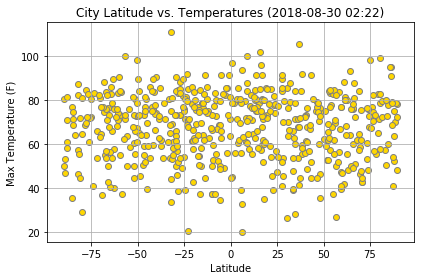

In [6]:
temperatureLatitudePlot = plt.scatter(latitudes, temperatures, color="Gold", alpha=1, edgecolor="gray", label="Urban", linewidth=1) #s=driversPerCity*7,
plt.title(f"City Latitude vs. Temperatures ({now.strftime('%Y-%m-%d %H:%M')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#plt.text(42, 42, s="Note: Circle size correlates with driver count per city.")
plt.grid()
#plt.legend( handles=[urbanPlot, suburbanPlot, ruralPlot], loc="best")
plt.savefig("latitudeVStemperature.png")
plt.tight_layout()
#################################################################################################################

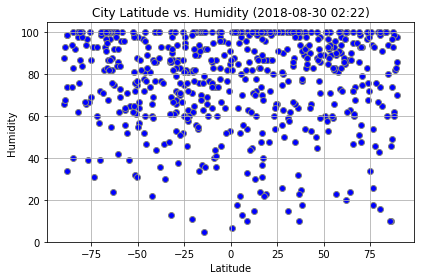

In [7]:
humidityLatitudePlot = plt.scatter(latitudes, humidities, color="Blue", alpha=1, edgecolor="gray", label="Urban", linewidth=1) #s=driversPerCity*7,
plt.title(f"City Latitude vs. Humidity ({now.strftime('%Y-%m-%d %H:%M')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
#plt.text(42, 42, s="Note: Circle size correlates with driver count per city.")
plt.grid()
#plt.legend( handles=[urbanPlot, suburbanPlot, ruralPlot], loc="best")
plt.savefig("latitudeVShumidity.png")
plt.tight_layout()
#################################################################################################################

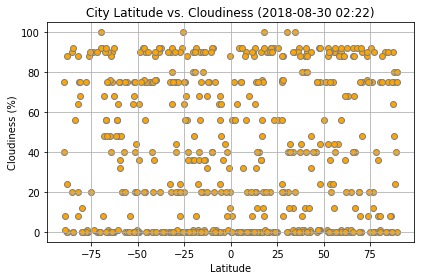

In [8]:
cloudinessLatitudePlot = plt.scatter(latitudes, cloudinesses, color="Orange", alpha=1, edgecolor="gray", label="Urban", linewidth=1) #s=driversPerCity*7,
plt.title(f"City Latitude vs. Cloudiness ({now.strftime('%Y-%m-%d %H:%M')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.text(42, 42, s="Note: Circle size correlates with driver count per city.")
plt.grid()
#plt.legend( handles=[urbanPlot, suburbanPlot, ruralPlot], loc="best")
plt.savefig("latitudeVScloudiness.png")
plt.tight_layout()
#################################################################################################################

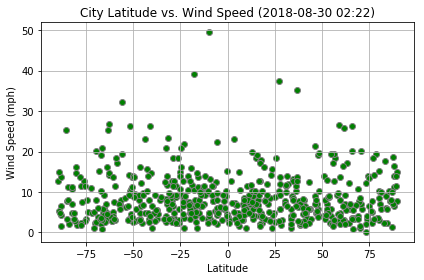

In [9]:
windSpeedLatitudePlot = plt.scatter(latitudes, windSpeeds, color="Green", alpha=1, edgecolor="gray", label="Urban", linewidth=1) #s=driversPerCity*7,
plt.title(f"City Latitude vs. Wind Speed ({now.strftime('%Y-%m-%d %H:%M')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.text(42, 42, s="Note: Circle size correlates with driver count per city.")
plt.grid()
#plt.legend( handles=[urbanPlot, suburbanPlot, ruralPlot], loc="best")
plt.savefig("latitudeVSwindspeeds.png")
plt.tight_layout()
#################################################################################################################